# sklearn.ensemble.RandomForestRegressor
- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve

from sklearn.ensemble import RandomForestRegressor

In [2]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head]

# Validation curves

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# n_estimators
- int, default=100
- The number of trees in the forest.

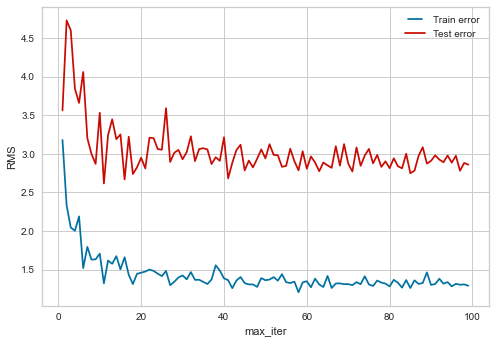

In [6]:
learning_rates = np.arange(1, 100, 1)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(n_estimators=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_iter')
plt.show()

## criterion{“mse”, “mae”}, 
- default=”mse”
- The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.

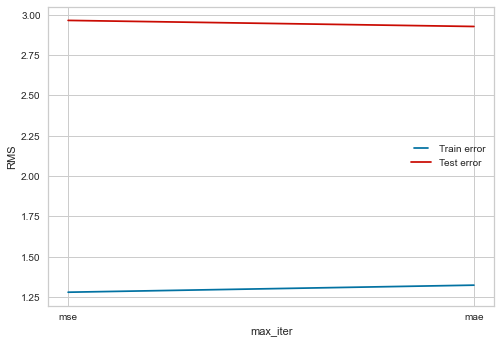

In [7]:
learning_rates = ['mse','mae']
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(criterion=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_iter')
plt.show()

# Max_depth
- int, default=None
- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

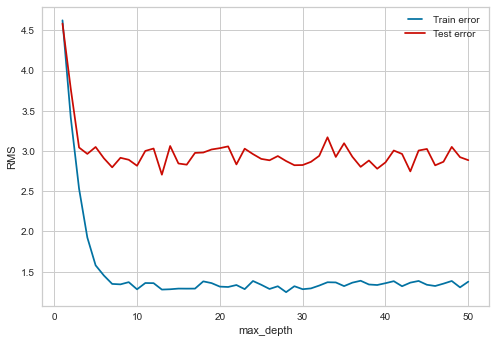

In [8]:
learning_rates = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(max_depth=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_depth')
plt.show()

# min_samples_split
- int or float, default=2
- The minimum number of samples required to split an internal node:
- If int, then consider min_samples_split as the minimum number.
- If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

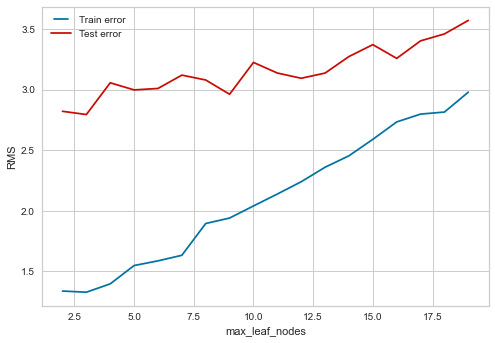

In [10]:
learning_rates = np.arange(2, 20, 1)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(min_samples_split=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_leaf_nodes')
plt.show()

# min_samples_leaf
- int or float, default=1
- The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

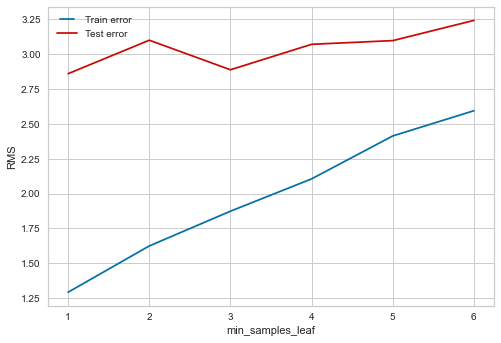

In [13]:
learning_rates = np.arange(1, 7, 1)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(min_samples_leaf=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_leaf')
plt.show()

---
---

# Random Hyperparameter Grid

In [82]:
n_estimators = [40,45,50,60]
max_features = ['auto','sqrt']
max_depth = [17,20,23]
min_samples_split = [3,4,5,6]
min_samples_leaf = [3,4,5,6]
criterion=['mse','mae']
warm_start=[True,False]
oob_score=[True,False]
bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'warm_start': warm_start,
               'oob_score': oob_score,
               'bootstrap': bootstrap}

In [83]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 250, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 1188 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   41.6s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=250,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [17, 20, 23],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6],
                                        'n_estimators': [40, 45, 50, 60],
                                        'oob_score': [True, False],
                                        'warm_start': [True, False]},
                   random_state=42, verbose=2)

In [84]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=17, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=45)

In [30]:
rf_random.best_params_

{'warm_start': False,
 'oob_score': True,
 'n_estimators': 40,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'mse',
 'bootstrap': True}

In [35]:
# mod=RandomForestRegressor(n_estimators=50,min_samples_leaf = 2,min_samples_split=8,criterion="mse",max_features='sqrt', max_depth = 25,max_samples= None,n_jobs=-1) ##HIC

# mod=RandomForestRegressor(n_estimators=50,min_samples_leaf = 2,min_samples_split=8,criterion="mse",max_features='sqrt', max_depth = 25,max_samples= None,n_jobs=-1) ##HIC 1 -- 0.658436
# mod=RandomForestRegressor(n_estimators=60,min_samples_leaf = 3,min_samples_split=3,criterion="mse",max_features='auto', max_depth = 25,max_samples= None,n_jobs=-1) ##HIC 2 -0.772471
# mod=RandomForestRegressor(n_estimators=40,min_samples_leaf = 1,min_samples_split=3,criterion="mse",max_features='auto', max_depth = 10,max_samples= None,n_jobs=-1) ##neck-- 0.87
# mod=RandomForestRegressor(n_estimators=60,min_samples_leaf = 1,min_samples_split=5,criterion="mse",max_features='auto', max_depth = 25,max_samples= None,n_jobs=-1) ##head acc --1.18
# mod=RandomForestRegressor(n_estimators=70,min_samples_leaf = 7,min_samples_split=3,criterion="mse",max_features=0.5, max_depth = 30,max_samples= None,n_jobs=-1) ##head acc 2--1.13
# mod=RandomForestRegressor(n_estimators=40,min_samples_leaf = 3,min_samples_split=3,criterion="mse",max_features=0.5, max_depth = 15,max_samples= None,n_jobs=-1) ##head acc 2--1.20
# mod=RandomForestRegressor(n_estimators=40,min_samples_leaf = 1,min_samples_split=5,criterion="mse",max_features='sqrt', max_depth = 15,max_samples= None,n_jobs=-1) ##chest--1.011--0.69

In [3]:
#chest
# mod=RandomForestRegressor(bootstrap=False, max_depth=10, max_features=0.5,
#                       min_samples_leaf=3, min_samples_split=4, n_estimators=60,
#                       n_jobs=-1, random_state=0, warm_start=True)
# mod=RandomForestRegressor(max_depth=20, max_features=0.5, min_samples_leaf=3,
#                       min_samples_split=4, n_estimators=50, n_jobs=-1,
#                       warm_start=True)
mod=RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=4,
                      n_estimators=40, oob_score=True)
# mod=RandomForestRegressor(bootstrap=False, max_depth=25, max_features=0.5,
#                       min_samples_leaf=6, min_samples_split=6, n_estimators=50,
#                       warm_start=True)

In [85]:
#neck
# mod=RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=4,
#                       n_estimators=40, oob_score=True,warm_start=False,max_features='auto',criterion='mse',bootstrap=True)
# mod=RandomForestRegressor(max_depth=23, min_samples_leaf=3, min_samples_split=4,
#                       n_estimators=45, warm_start=True)

# head acc
# mod=RandomForestRegressor(criterion='mae', max_depth=17, min_samples_leaf=6,
#                       min_samples_split=5, n_estimators=40, oob_score=True,
#                       warm_start=True)

# HIC
mod=RandomForestRegressor(max_depth=17, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=45)

In [86]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [87]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')


<Figure size 576x396 with 0 Axes>

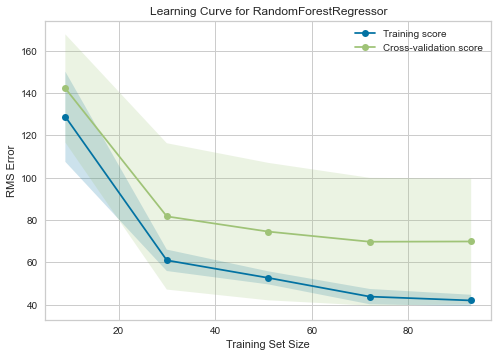

In [88]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [89]:
X = X.to_numpy()
y = y.to_numpy()


In [90]:
y_Test=y_Test.to_numpy()

In [91]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 126.439941

Root Mean squared error: 53.484103

Root Mean squared error: 48.532262

Root Mean squared error: 111.884774

Root Mean squared error: 62.444858

Root Mean squared error: 49.079965

Root Mean squared error: 35.486685

Root Mean squared error: 62.875371

Root Mean squared error: 103.355783

Root Mean squared error: 73.508886

error COV--->0    0.786295
dtype: float64  error mean --->0    57.401783
Name: mean, dtype: float64  error std --->0    45.13476
Name: std, dtype: float64


---
---

# Grid search

In [92]:
# n_estimators = [40,50,60]
# max_features = ['auto',0.5,'sqrt']
# max_depth = [15,20,25]
# min_samples_split = [4,5,6]
# min_samples_leaf = [4,5,6]
# criterion=['mse','mae']
# warm_start=[True,False]
# oob_score=[True,False]
# bootstrap = [True,False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'criterion': criterion,
#                'warm_start': warm_start,
#                'oob_score': oob_score,
#                'bootstrap': bootstrap}

## Neck
n_estimators = [40,45,50,60]
max_features = ['auto','sqrt']
max_depth = [17,20,23]
min_samples_split = [3,4,5,6]
min_samples_leaf = [3,4,5,6]
criterion=['mse','mae']
warm_start=[True,False]
oob_score=[True,False]
bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'warm_start': warm_start,
               'oob_score': oob_score,
               'bootstrap': bootstrap}

In [15]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Chest_deflection]

In [94]:
rf = RandomForestRegressor()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

Fitting 10 folds for each of 6144 candidates, totalling 61440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'], 'max_depth': [17, 20, 23],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [40, 45, 50, 60],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [96]:
reg.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 40,
 'oob_score': False,
 'warm_start': False}

In [95]:
reg.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=40)

---
---

In [20]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head]

In [21]:
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=110,min_samples_split=3,min_samples_leaf=1,max_features='auto',max_depth=25,learning_rate=0.02)#--0.64
# mod=RandomForestRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=6,criterion='mse',bootstrap=True,max_features='auto',warm_start=False,n_estimators=40, oob_score=True)

#Neck
# mod=RandomForestRegressor(max_depth=17, min_samples_leaf=3, min_samples_split=6,criterion='mse',bootstrap=True,max_features='auto',warm_start=False,n_estimators=60, oob_score=False)
# # Head acc
# mod=RandomForestRegressor(max_depth=23, min_samples_leaf=5, min_samples_split=6,criterion='mse',bootstrap=True,max_features='auto',n_estimators=50, oob_score=False,warm_start=True)

## HIC
mod=RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=6,criterion='mse',bootstrap=True,max_features='auto',n_estimators=40, oob_score=False,warm_start=False)


In [22]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [23]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')
kf=cv

## Learning Curve

<Figure size 576x396 with 0 Axes>

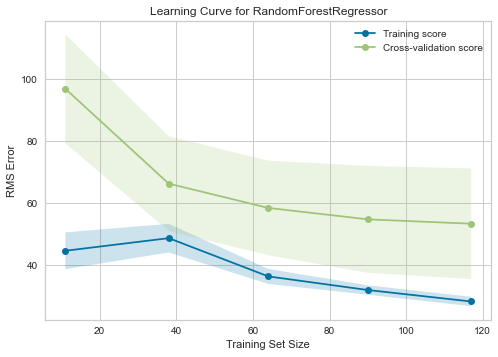

In [24]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [25]:
pd.DataFrame(test_mean)

,0
0,96.981991
1,66.257892
2,58.393203
3,54.689493
4,53.276857


## Unknown data test

In [31]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 5.541775

Root Mean squared error: 1.763935

Root Mean squared error: 2.923000

Root Mean squared error: 3.125060

Root Mean squared error: 2.736085

Root Mean squared error: 3.867186

Root Mean squared error: 4.227251

Root Mean squared error: 4.296030

Root Mean squared error: 3.076461

Root Mean squared error: 4.733301

error COV--->0    0.861884
dtype: float64  error mean --->0    2.854625
Name: mean, dtype: float64  error std --->0    2.460355
Name: std, dtype: float64


# train score

In [32]:
# ytestunk=HBM_Train.predict(X)
# err=np.zeros(len(ytestunk))
# for u in range (0,len(ytestunk)):
#     err[u]=np.sqrt((y[u]-ytestunk[u])**2)
# a=pd.DataFrame(err).describe()
# cov_r=a.loc['std']/abs(a.loc['mean'])
# print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.039281
dtype: float64  error mean --->0    1.825483
Name: mean, dtype: float64  error std --->0    1.897189
Name: std, dtype: float64


In [33]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('chest/RFun.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('chest/RFtr.csv')

In [47]:
Data=pd.read_csv('res_10param.csv',index_col=None)
nam=Data.describe()
sd=nam.columns[15]
print(sd)

Head Acc


In [48]:
act=abs(nam.loc['mean'][sd])
new=abs(Data[sd].values)

C:\Users\ypyas\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


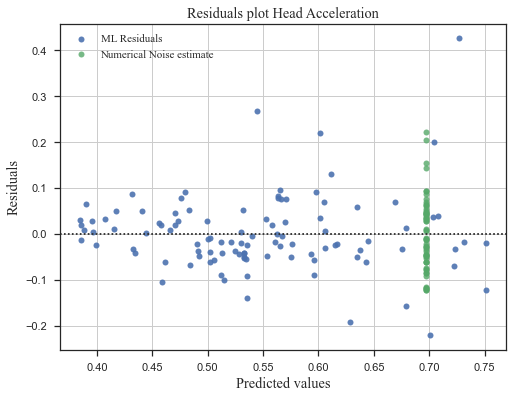

In [50]:
mean=abs(a.loc['mean'])
std=a.loc['std']
csfont = {'fontname':'Times New Roman'}
plt.figure(figsize=(8, 6))

sns.set_theme(style="ticks")
sns.residplot(y=abs(y), x=abs(ytestunk),scatter_kws={'alpha': 0.9},label='ML Residuals')
# plt.errorbar(mean, 0, yerr=std, fmt='.k');
# sns.residplot(x=np.ones(50)*ass.loc['mean']['HIC 15'], y=df['HIC 15'].to_numpy(), lowess=True, color="g",label='Numerical noise')
sns.residplot(x=np.ones(len(new))*new.mean(), y=new, lowess=True, color="g",label='Numerical Noise estimate')

plt.title('Residuals plot Head Acceleration', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()
plt.grid()
plt.savefig('resk1.png')
plt.show()